In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.io import loadmat
import seaborn as sns
import numpy as np
np.random.seed(0)

# Classification in a 2-dimensional space

The file `fisherData.mat` contains two data matrices, `data1` and `data2`, whose rows contain hypothetical normalized responses of 2 mouse auditory neurons to different stimuli – The first matrix contains responses to dogs barking, and the second are responses to cat vocalizations. You would like to know whether the responses of these two neurons could be used by the mouse to differentate the two types of sound. We’ll implement three classifiers.

In [2]:
data = loadmat('fisherData.mat')
index = pd.Series(np.arange(len(data['data1'])), name='trial')
columns = pd.Series([0, 1], name='neuron')
dog = pd.DataFrame(data['data1'], columns=columns, index=index)
cat = pd.DataFrame(data['data2'], columns=columns, index=index)

# a)

The prototype classifier assigns to observations the label of the class of training samples whose mean is closest to the observation. To be precise, given a mean-centered example $x$, the classifier assigns it a class $\hat y$ according to the rule 

$\hat y = \begin{cases}
    A & \text{if $\hat w^Tx > 0$} \\
    B & \text{otherwise}
\end{cases}$ where the discriminant vector $\hat w$ is $\frac{\mu_A - \mu_B}{\lVert \mu_A - \mu_B \rVert}$.

Assume that samples of class $A$ are drawn from $\mathcal{N}(\mu_A, I)$ and samples of class $B$ are drawn from $\mathcal{N}(\mu_B, I)$. Then classes $A$ and $B$ have likelihood functions

$p(x|y=A) = \frac{1}{\sqrt{(2\pi)^N \lvert I \rvert}} e^{-\frac{1}{2}(x - \mu_A)^T I (x - \mu_A)} = \frac{1}{\sqrt{(2\pi)^N}} e^{-\frac{1}{2}(x - \mu_A)^T (x - \mu_A)}$ and

$p(x|y=B) = \frac{1}{\sqrt{(2\pi)^N}} e^{-\frac{1}{2}(x - \mu_B)^T (x - \mu_B)}$.

A maximum likelihood classifier assigns to observations the label of the class whose likelihood function is maximized by the observation. It assigns an example $x$ to class $\hat y$ according to the rule

$\hat y = \begin{cases}
    A & \text{if $p(x|y=A) > p(x|y=B)$} \\
    B & \text{otherwise}
\end{cases} = \begin{cases}
    A & \text{if $\frac{p(x|y=A)}{p(x|y=B)} > 1$} \\
    B & \text{otherwise}
\end{cases} = \begin{cases}
    A & \text{if $\ln[\frac{p(x|y=A)}{p(x|y=B)}] > 0$} \\
    B & \text{otherwise}
\end{cases}$

We must show that the two different decision rules stated above are equivalent. Consider the quantity $\ln\frac{p(x|y=A)}{p(x|y=B)}$. We may rewrite it as

$\ln[\frac{\frac{1}{\sqrt{(2\pi)^N}} e^{-\frac{1}{2}(x - \mu_A)^T (x - \mu_A)}}{\frac{1}{\sqrt{(2\pi)^N}} e^{-\frac{1}{2}(x - \mu_B)^T (x - \mu_B)}}]
= \ln[\frac{e^{-\frac{1}{2}(x - \mu_A)^T (x - \mu_A)}}{e^{-\frac{1}{2}(x - \mu_B)^T (x - \mu_B)}}]
= -\frac{1}{2}(x - \mu_A)^T (x - \mu_A) + \frac{1}{2}(x - \mu_B)^T (x - \mu_B)$

$= -\frac{1}{2}x^Tx + \frac{1}{2}x^T\mu_A + \frac{1}{2}\mu_A^Tx - \frac{1}{2}\mu_A^T\mu_A + \frac{1}{2}x^Tx - \frac{1}{2}x^T\mu_B - \frac{1}{2}\mu_A^Tx + \frac{1}{2}\mu_B^T\mu_B$

$= x^T\mu_A - x^T\mu_B - \frac{1}{2}(\mu_A^T\mu_A - \mu_B^T\mu_B)$

$= x^T(\mu_A - \mu_B) - \frac{1}{2}(\mu_A^T\mu_A - \mu_B^T\mu_B)$.

We may then write the inequality in our decision rule as

$x^T(\mu_A - \mu_B) > \frac{1}{2}(\mu_A^T\mu_A - \mu_B^T\mu_B)$ or

$w^Tx > b$,

where $w = \mu_A - \mu_B$ and $b = \frac{1}{2}\mu_A^T\mu_A - \frac{1}{2}\mu_B^T\mu_B$.

Let $\hat w$ be the unit vector $\frac{w}{\lVert w \rVert}$. Then our inequality is

$\hat w^Tx > \frac{b}{\lVert w \rVert}$.

Since we assumed $x$ to be mean-centered, we may take $b$ (the affine shift from the origin) to be $\vec 0$. Then we can write the ML decision rule as

$\hat y = \begin{cases}
    A & \text{if $\hat w^Tx > 0$} \\
    B & \text{otherwise}
\end{cases}$ where $\hat w$ = $\frac{\mu_A - \mu_B}{\lVert \mu_A - \mu_B \rVert}$.

This coincides with the decision rule for the prototype classifier. Therefore, the prototype classifier is the maximum likelihood classifier under the assumption above.

---

In particular, given an example $x$, the classifier 

The discriminant vector for a prototype classifier is $\hat w = \frac{\mu_1 - \mu_2}{\lVert \mu_1 - \mu_2 \rVert}$. Given an example $x$, the classifier assigns it a 

If this is a maximum likelihood classifier, then given a vector $x$ it chooses the $\theta_i$ that maximizes $p(x|\theta_i)$, where $p(x|\theta_i)$ is of the form $e^{-\frac{1}{2} (x - \mu_i)^T (x - \mu_i)}$ (for isotropic Gaussians, the covariance matrix is the identity matrix and may be neglected).

Given an example $x$, the prototype classifier assigns it a class $\hat\theta$ according to the rule

$\hat\theta =
  \begin{cases}
    \theta_1 & \text{if $\lVert x - \mu_1 \rVert \geq \lVert x - \mu_2 \rVert$} \\
    \theta_2 & \text{otherwise}
  \end{cases}
  $

Let $\lVert x - \mu_1 \rVert \geq \lVert x - \mu_2 \rVert$. The classifier assigns $x$ to class $\theta_1$ by our decision rule. But $\lVert x - \mu_1 \rVert \geq \lVert x - \mu_2 \rVert$ implies that $(x - \mu_1)^T (x - \mu_1) \geq (x - \mu_2)^T (x - \mu_2)$, and therefore that $p(x|\theta_1) \geq p(x|\theta_2)$. So the classifier gives a maximum likelihood estimate when $\lVert x - \mu_1 \rVert \geq \lVert x - \mu_2 \rVert$.

On the other hand, let $\lVert x - \mu_1 \rVert \lt \lVert x - \mu_2 \rVert$. The classifier assigns $x$ to class $\theta_2$ by our decision rule. $\lVert x - \mu_1 \rVert \lt \lVert x - \mu_2 \rVert$ implies that $(x - \mu_1)^T (x - \mu_1) \lt (x - \mu_2)^T (x - \mu_2)$, and therefore that $p(x|\theta_1) \lt p(x|\theta_2)$. So the classifier also gives a maximum likelihood estimate when $\lVert x - \mu_1 \rVert \lt \lVert x - \mu_2 \rVert$.

Therefore the classifier gives a maximum likelihood estimate for any $x$.

In [81]:
x = np.linspace(-6, 7, 1000)
y = np.linspace(-1, 2.7, 1000)
X, Y = np.meshgrid(x, y)
D = np.stack([X.flatten(), Y.flatten()]).T

In [82]:
mu1 = dog.mean(axis=0).values
mu2 = cat.mean(axis=0).values
pdf1 = np.exp(-0.5 * np.sum((D - mu1) ** 2, axis=1))
pdf2 = np.exp(-0.5 * np.sum((D - mu2) ** 2, axis=1))
mask = pdf1 > pdf2
im = mask.reshape(1000, 1000)

We may visualize the solution by generating a binary image showing the classification output, with the data points scatterplotted on top.

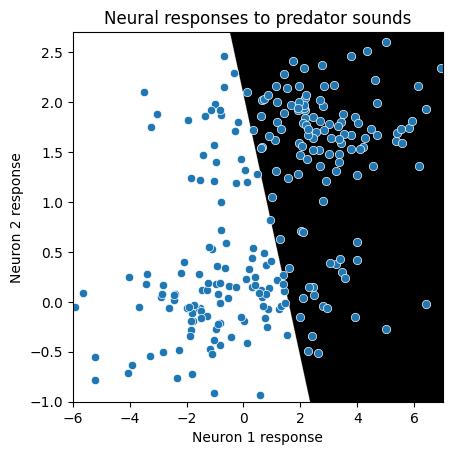

In [83]:
plt.subplots()
plt.title('Neural responses to predator sounds')
plt.imshow(np.flipud(im), extent=(x.min(), x.max(), y.min(), y.max()), cmap='gray')
sns.scatterplot(pd.concat([dog, cat]), x=0, y=1)
plt.xlabel('Neuron 1 response')
plt.ylabel('Neuron 2 response')
plt.gca().set_aspect((x.max() - x.min())/(y.max() - y.min()))

Compute the weight vector, and plot it with the decision boundary.

In [135]:
center = pd.concat([dog, cat]).mean(axis=0)
w = mu2 - mu1
w /= np.sqrt(w @ w)

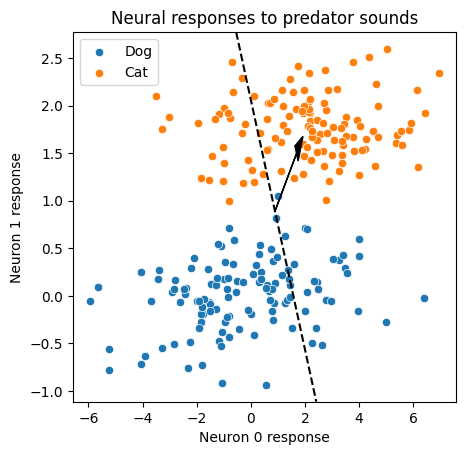

In [136]:
plt.subplots()
plt.title('Neural responses to predator sounds')
sns.scatterplot(dog, x=0, y=1, label='Dog')
sns.scatterplot(cat, x=0, y=1, label='Cat')
plt.gca().arrow(*center, *w, head_width=0.2, color='k')
plt.axline(center, slope=-w[0]/w[1], color="black", linestyle='--')
plt.xlabel('Neuron 0 response')
plt.ylabel('Neuron 1 response')
plt.gca().set_aspect(13/3.7)

What fraction of points are correctly classified?

In [110]:
X = pd.concat([dog, cat]) - center
y = np.concatenate([-np.ones(len(dog)), np.ones(len(cat))])
frac = np.sum(np.sign(X @ w) == y) / X.shape[0]
print(f"Fraction correct: {frac:0.2f}")

Fraction correct: 0.78


We can plot the distributions of projection along the discriminant vector for each class.

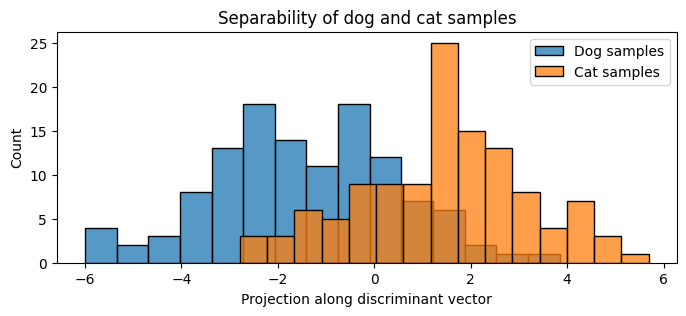

In [131]:
dog_proj = (dog - center) @ w
cat_proj = (cat - center) @ w
plt.subplots(figsize=(8, 3))
sns.histplot(dog_proj, label='Dog samples', bins=15)
sns.histplot(cat_proj, label='Cat samples', bins=15)
plt.title('Separability of dog and cat samples')
plt.xlabel('Projection along discriminant vector')
plt.ylabel('Count')
plt.legend()
plt.show()

The two distributions are not very well separated. Consider a decision line bisecting their overlap (near x=0 in the histogram above). "Dog" samples to the right of this line and "cat" samples to the left of this line will be misclassified.

# b)